# Module 6. Labs regression analysis

In [602]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [603]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


<Axes: xlabel='Hwt', ylabel='Bwt'>

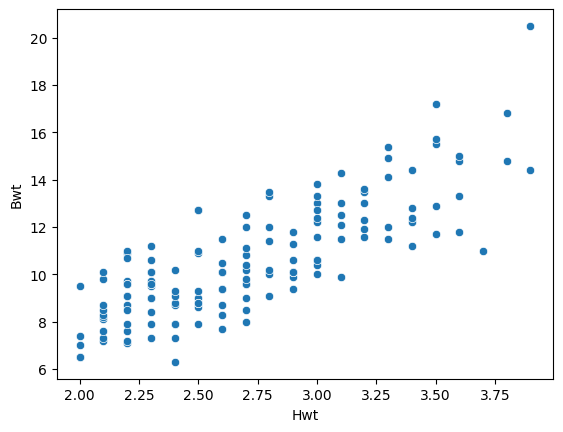

In [604]:
sns.scatterplot(data = cats, y="Bwt", x="Hwt")

3. Calculate and draw the regression line.


<Axes: xlabel='Hwt', ylabel='Bwt'>

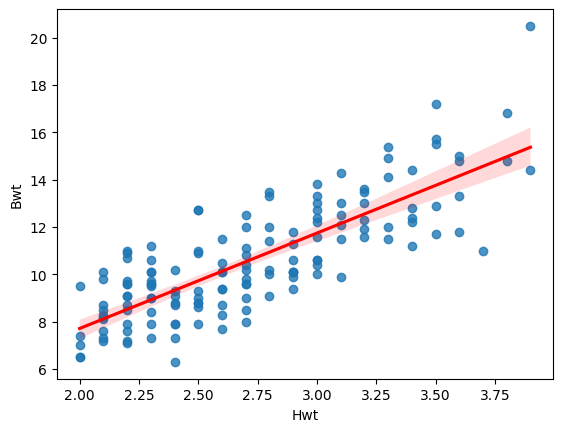

In [605]:
sns.regplot(data=cats, y='Bwt', x='Hwt', line_kws={'color':'red'})

In [606]:
# Calculate regression line

def calculateRegressionLine(x_axis,y_axis):
    mx = x_axis.mean()
    my = y_axis.mean()
    xx = x_axis - mx
    yy = y_axis - my
    beta1 = sum(xx * yy) / sum(xx ** 2)
    beta0 = my - beta1 * mx

    # Regression line equation
    print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")
    
calculateRegressionLine(cats.Hwt,cats.Bwt)

ŷ = -0.35 + 4.03 x


In [607]:
from sklearn.linear_model import LinearRegression

male_chinstrap_x = cats.Hwt.values.reshape(-1,1)
male_chinstrap_y = cats.Bwt

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [608]:
covar = np.cov(cats.Hwt, cats.Bwt, ddof=1)[0][1]

# Correlation calculated from covariance
R1 = covar / (cats.Bwt.std() * cats.Hwt.std())
print(f"R = {R1}")
print("R² = ", R1**2)

R = 0.8041347873155131
R² =  0.6466327561709655


5. Interpret the results from the previous steps.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [609]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


<Axes: xlabel='Hwt', ylabel='Bwt'>

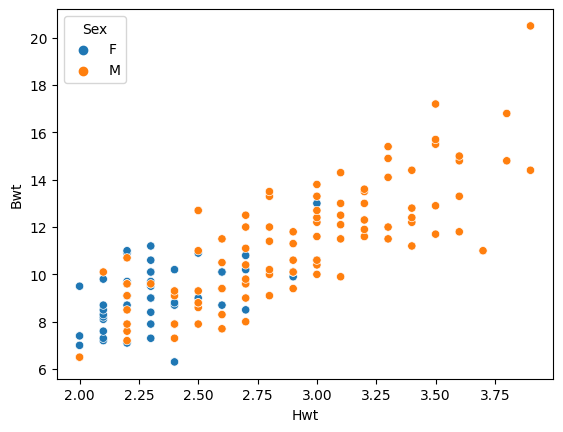

In [610]:
sns.scatterplot(data = cats, y="Bwt", x="Hwt", hue="Sex")

3. Calculate and draw the regression line.


In [611]:
# Calculate regression line

def calculateRegressionLine(x_axis,y_axis):
    mx = x_axis.mean()
    my = y_axis.mean()
    xx = x_axis - mx
    yy = y_axis - my
    beta1 = sum(xx * yy) / sum(xx ** 2)
    beta0 = my - beta1 * mx

    # Regression line equation
    print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")
    
calculateRegressionLine(cats.Hwt[cats.Sex == "M"],cats.Bwt[cats.Sex == "M"])

ŷ = -1.18 + 4.31 x


In [612]:
def calculateRegressionLine(x_axis,y_axis):
    mx = x_axis.mean()
    my = y_axis.mean()
    xx = x_axis - mx
    yy = y_axis - my
    beta1 = sum(xx * yy) / sum(xx ** 2)
    beta0 = my - beta1 * mx

    # Regression line equation
    print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")
    
calculateRegressionLine(cats.Hwt[cats.Sex == "F"],cats.Bwt[cats.Sex == "F"])

ŷ = 2.98 + 2.64 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [613]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(cats.Hwt[cats.Sex == "M"],cats.Bwt[cats.Sex == "M"])

R = 0.7930443171812301
R² =  0.6289192890134435


In [614]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(cats.Hwt[cats.Sex == "F"],cats.Bwt[cats.Sex == "F"])

R = 0.5320496665060397
R² =  0.28307684762918806


In [615]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(cats.Hwt,cats.Bwt)

R = 0.8041347873155131
R² =  0.6466327561709655


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [616]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";")
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [617]:
print("Year : ", farms.year.describe())
print("number_of_farms : ", farms.number_of_farms.describe())
print("average_area_per_farm_(ha) : ", farms["average_area_per_farm_(ha)"].describe())

Year :  count      41.000000
mean     2000.000000
std        11.979149
min      1980.000000
25%      1990.000000
50%      2000.000000
75%      2010.000000
max      2020.000000
Name: year, dtype: float64
number_of_farms :  count       41.000000
mean     43524.097561
std      16820.629447
min      23225.000000
25%      28331.000000
50%      40949.000000
75%      57811.000000
max      75706.000000
Name: number_of_farms, dtype: float64
average_area_per_farm_(ha) :  count       41
unique      41
top       8,38
freq         1
Name: average_area_per_farm_(ha), dtype: object


3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [618]:
import locale

farms["average_area_per_farm_(ha)"] = farms["average_area_per_farm_(ha)"].apply(lambda x: str(x).replace(',', '.'))
farms["average_area_per_farm_(ha)"] = farms["average_area_per_farm_(ha)"].apply(lambda x: locale.atof(x))

print("average_area_per_farm_(ha) : ", farms["average_area_per_farm_(ha)"].describe())

average_area_per_farm_(ha) :  count    41.000000
mean     16.571707
std       6.365708
min       8.380000
25%      10.450000
50%      15.550000
75%      21.770000
max      26.900000
Name: average_area_per_farm_(ha), dtype: float64


4. Draw a scatter plot of the number of farms versus the year.


<Axes: xlabel='year', ylabel='number_of_farms'>

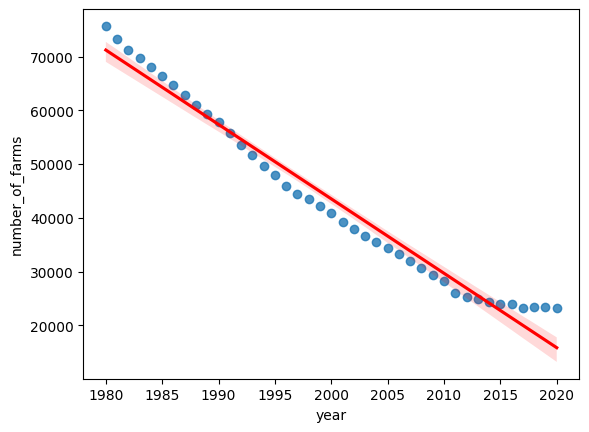

In [619]:
sns.regplot(data = farms, y="number_of_farms", x="year", line_kws={"color":"red"})



5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [620]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(farms["number_of_farms"],farms["year"])

R = -0.9861066349492857
R² =  0.9724062954910039


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [621]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(farms["number_of_farms"],farms["year"])

R = -0.9861066349492857
R² =  0.9724062954910039


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

<Axes: xlabel='year', ylabel='average_area_per_farm_(ha)'>

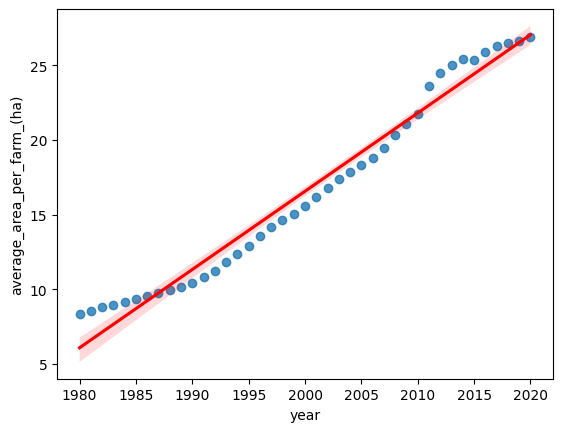

In [622]:
sns.regplot(data = farms, y="average_area_per_farm_(ha)", x="year", line_kws={"color":"red"})

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [623]:
def calculateRegressionLine(x_axis,y_axis):
    mx = x_axis.mean()
    my = y_axis.mean()
    xx = x_axis - mx
    yy = y_axis - my
    beta1 = sum(xx * yy) / sum(xx ** 2)
    beta0 = my - beta1 * mx
    return beta0,beta1

    
beta0, beta1 = calculateRegressionLine(farms["year"],farms["average_area_per_farm_(ha)"])

    # Regression line equation
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

print("Average farm area (ha) in 2035 = ", (beta0+beta1*2035))

ŷ = -1031.90 + 0.52 x
Average farm area (ha) in 2035 =  34.91987804878045


In [624]:
from sklearn.linear_model import LinearRegression

male_chinstrap_x = farms["year"].values.reshape(-1,1)
male_chinstrap_y = farms["average_area_per_farm_(ha)"]

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -1031.90 + 0.52 x


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

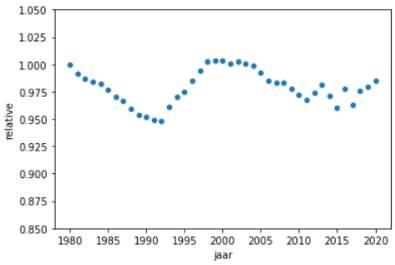


In [625]:
farms["Total_farm_area(ha)"] = farms["number_of_farms"]*farms["average_area_per_farm_(ha)"]

area_1980 = int(farms["Total_farm_area(ha)"][farms["year"]==1980].iloc[0])

farms["Relative_area_to_1980"] = farms["Total_farm_area(ha)"] / area_1980

farms.head()

,year,number_of_farms,average_area_per_farm_(ha),Total_farm_area(ha),Relative_area_to_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987257
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981942


<Axes: xlabel='year', ylabel='Relative_area_to_1980'>

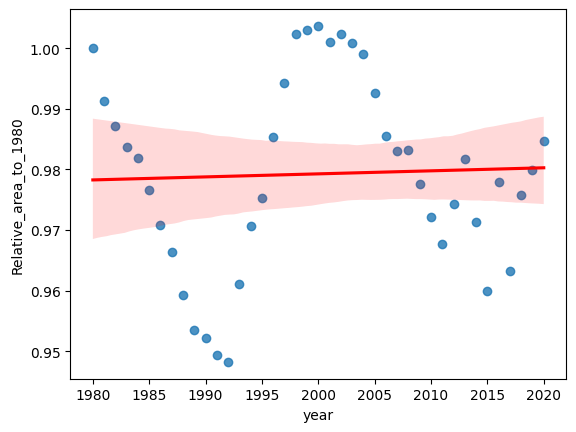

In [626]:
sns.regplot(data = farms, y="Relative_area_to_1980", x="year", line_kws={"color":"red"})

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [627]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [628]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

movies.dropna(subset=['7-day Gross','14-day Gross',	'Total US Gross'], inplace=True)


for col in cols_with_dollars:
    movies[col] = movies[col].apply(lambda x: str(x).replace('$', ''))
    movies[col] = movies[col].apply(lambda x: str(x).replace(' ', ''))
    movies[col] = movies[col].apply(lambda x: locale.atof(x))
    movies[col] = movies[col]/1000000



  
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0


Text(0.5, 1.0, '14-day Gross')

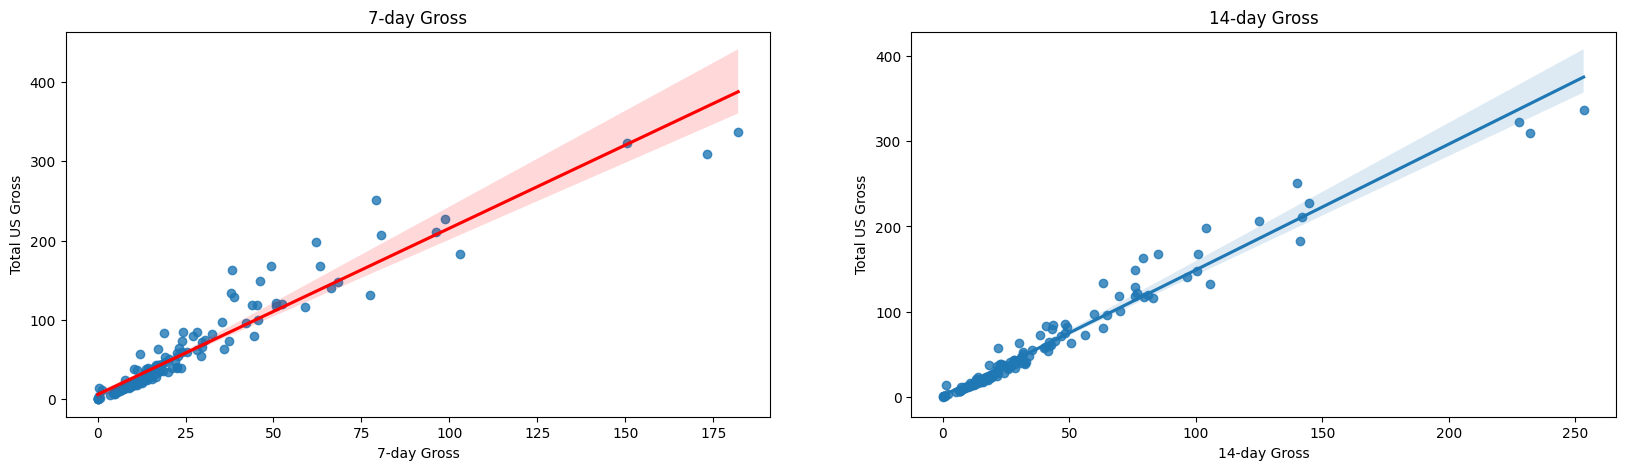

In [629]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 2 columns

# Plot regression for the first subplot
sns.regplot(data=movies, x='7-day Gross', y='Total US Gross', ax=axes[0], line_kws={"color":"red"})
axes[0].set_title('7-day Gross')

# Plot regression for the second subplot
sns.regplot(data=movies, x='14-day Gross', y='Total US Gross', ax=axes[1])
axes[1].set_title('14-day Gross')

3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

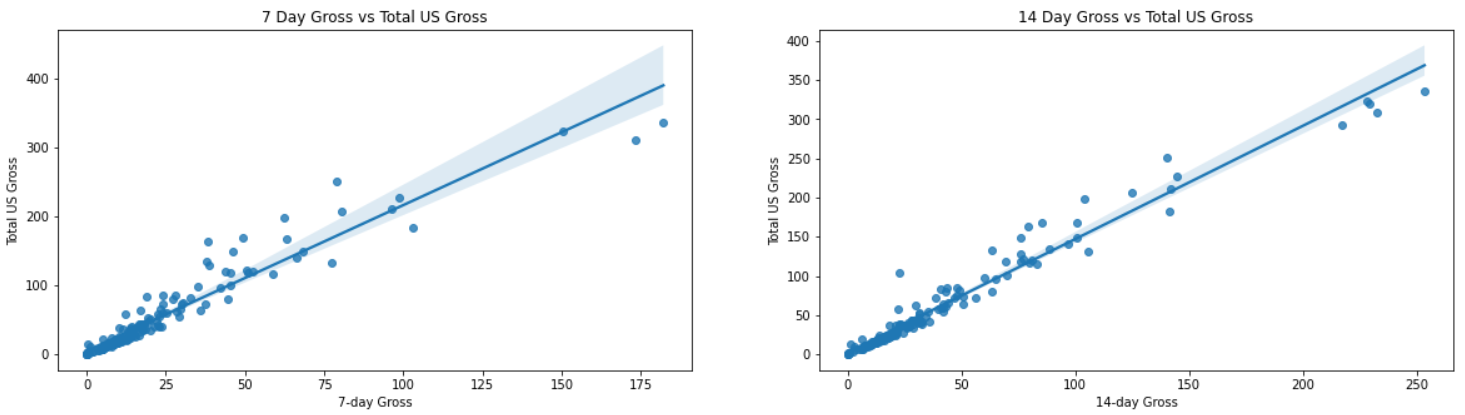

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [630]:
movies2= movies.dropna()

def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(movies2["Total US Gross"],movies2["7-day Gross"])

R = 0.9546454848370718
R² =  0.9113480017198079


In [631]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(movies2["Total US Gross"],movies2["14-day Gross"])

R = 0.9807311044212138
R² =  0.9618334991792538


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

Text(0.5, 1.0, '14-day Gross')

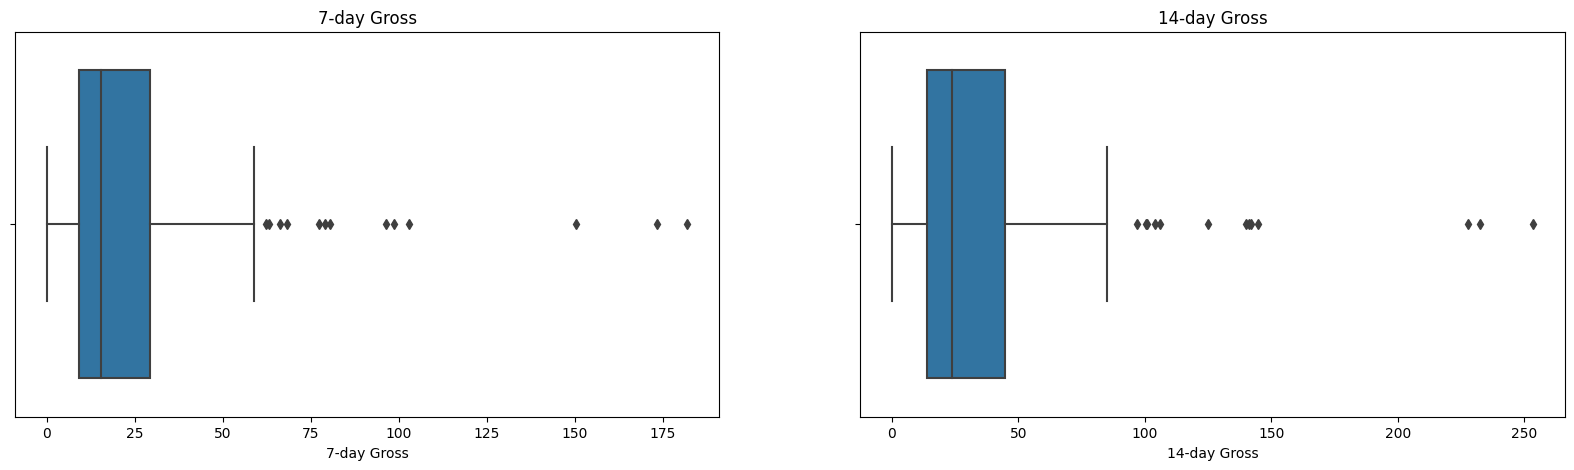

In [632]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 2 columns

# Plot regression for the first subplot
sns.boxplot(data=movies, x='7-day Gross', ax=axes[0])
axes[0].set_title('7-day Gross')

# Plot regression for the second subplot
sns.boxplot(data=movies, x='14-day Gross', ax=axes[1])
axes[1].set_title('14-day Gross')

6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

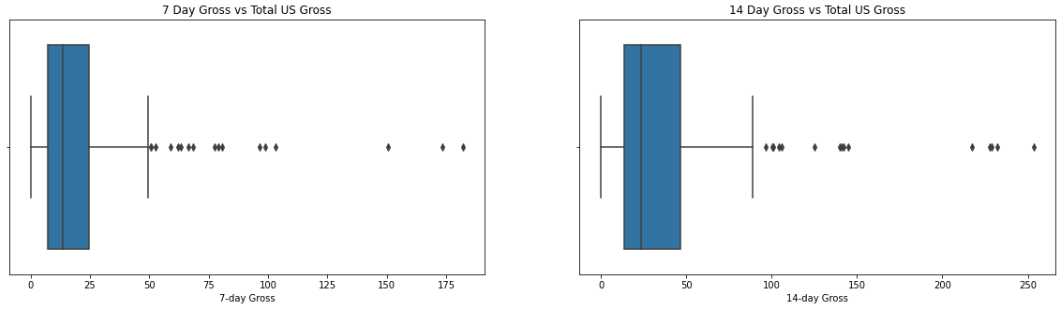

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [633]:
print(movies2['7-day Gross'].describe())

count     85.000000
mean      33.338456
std       35.016325
min        0.362501
25%       11.883609
50%       20.152024
75%       43.858000
max      182.070572
Name: 7-day Gross, dtype: float64


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

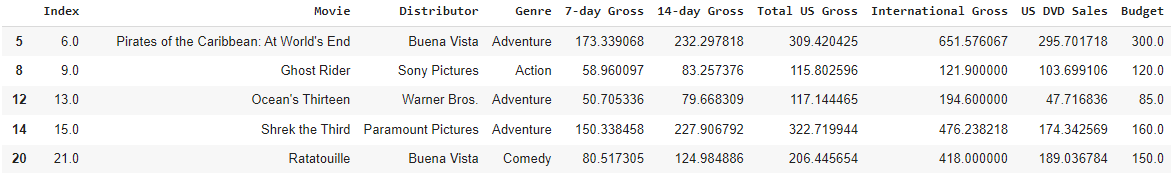

In [634]:
def getOutliers(data, column):
    outliers = data[column> 1.5 * column.std() + column.mean()]
    outliers.add(data[column< 1.5 * column.std() + column.mean()])
    return outliers

outliers = getOutliers(movies2, movies2["14-day Gross"])

outliers.add(getOutliers(movies2, movies2["7-day Gross"]))

outliers


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
60,61.0,Spider-Man 3,Sony Pictures,Adventure,182.070572,253.357629,336.530303,554.341323,123.997036,258.0
104,105.0,The Simpsons Movie,20th Century Fox,Comedy,102.949705,141.112342,183.135014,343.936008,96.337909,72.5
118,119.0,Night at the Museum,20th Century Fox,Comedy,79.055249,140.096754,250.863268,323.617573,153.286880,110.0
207,208.0,300,Warner Bros.,Action,96.288328,141.843655,210.614939,245.453242,261.158713,60.0


* 6.4 Remove the outliers out of the dataset.

In [635]:
movies3 = movies

movies3 =  movies[~movies['Index'].isin(outliers['Index'])]

movies3.head(20)

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0
9,10.0,Saw III,Lionsgate,Horror,44.576835,63.279443,80.238724,83.638091,47.124617,10.0
11,12.0,Beerfest,Warner Bros.,Comedy,10.151951,15.786241,19.185184,0.974132,28.372842,NaN
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50.705336,79.668309,117.144465,194.600000,47.716836,85.0
15,16.0,The Holiday,Sony Pictures,Romantic Comedy,17.110339,30.092962,63.280000,141.910324,71.202459,85.0
17,18.0,The Namesake,Fox Searchlight,Drama,0.361518,1.333480,13.610521,6.569588,9.345626,NaN
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0


* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [636]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)

    
r_rSquared(movies3["Total US Gross"],movies3["14-day Gross"])

R = 0.9752966879018519
R² =  0.9512036294323223


In [637]:
def r_rSquared(x_axis, y_axis):

    covar = np.cov(x_axis, y_axis, ddof=1)[0][1]

    # Correlation calculated from covariance
    R1 = covar / (y_axis.std() * x_axis.std())
    print(f"R = {R1}")
    print("R² = ", R1**2)
    
r_rSquared(movies3["Total US Gross"],movies3["7-day Gross"])

R = 0.9421472785511342
R² =  0.8876414944813085


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  
(a) Make the following plot  

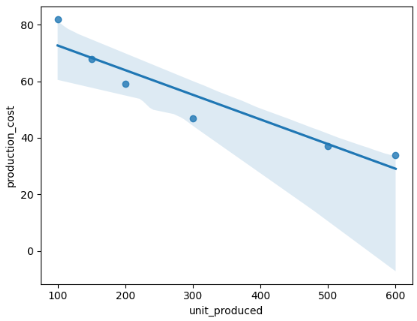

(b) Based on this plot  
(b.1) Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
(b.2) Can you decide whether the relationship between number of units produced and production costis weak / strong.  
(b.3) Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
(c) What is the production cost for the 400th unit?  
(d) How much loss will the company incur if not a single unit is produced?  
(e) How much does it cost in total to produce 1000 units  


Some answers  
(c) the 400th unit costs 46.5051  
(d) loss when no unit produced 81.392  
(e) total cost for 1000 units 37739.8969

In [638]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


In [639]:
from sklearn.linear_model import LinearRegression

male_chinstrap_x = df["unit_produced"].values.reshape(-1,1)
male_chinstrap_y = df["production_cost"]

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 81.39 + -0.09 x


In [640]:
print("400th unit will cost : ", (weight_model.intercept_ + weight_model.coef_[0]*400))


400th unit will cost :  46.50515463917525


In [641]:
print("1000th unit will cost : ", (weight_model.intercept_ + weight_model.coef_[0]*1000))



total = 0

i = 1

while i <= 1000:
    total += (weight_model.intercept_ + weight_model.coef_[0]*i)
    i+=1
    
print("The total cost for 1000 units = ",total)

1000th unit will cost :  -5.824742268041263
The total cost for 1000 units =  37739.89690721649
